In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.interpolate
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

def n_likes(n, array):
    return [n]*len(array)

Задаем число поднесущих

In [54]:
K = 10 # OFDM Sub Carriers

In [55]:
P = 1 # Number of Pilot Sub Carriers 
pilot_value = 3+3j # The known value each pilot transmits

All Carriers:   [0 1 2 3 4 5 6 7 8 9]
Pilot Carriers: [0 9]
Data Carriers:  [1 2 3 4 5 6 7 8]


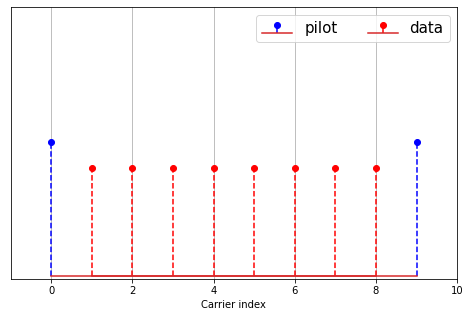

In [56]:
all_carriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])

pilot_carriers = all_carriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carriers also be a pilot
pilot_carriers = np.hstack([pilot_carriers, np.array([all_carriers[-1]])])
P = P+1

# data carriers are all remaining carriers
data_carriers = np.delete(all_carriers, pilot_carriers)

print ("All Carriers:   %s" % all_carriers)
print ("Pilot Carriers: %s" % pilot_carriers)
print ("Data Carriers:  %s" % data_carriers)
plt.figure(figsize=(8,5))

plt.stem(pilot_carriers, n_likes(5, pilot_carriers), use_line_collection=True, linefmt="b--", markerfmt='bo', label="pilot")
plt.stem(data_carriers, n_likes(4, data_carriers), use_line_collection=True,  linefmt="r--",  markerfmt='ro', label='data',)
plt.legend(fontsize=10, ncol=2, prop={'size': 15})
plt.xlim((-1,K)); plt.ylim((-0.1, 10))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True);


